# Using Principal Components Analysis to characterize the structure of population activity



In [2]:
# import required modules, to get "physion" see: https://github.com/yzerlaut/physion

import numpy as np
import pprint, os

from physion.analysis.read_NWB import Data
from physion.dataviz.show_data import MultimodalData

from datavyz import graph_env_notebook as ge

## Load some example data

In [3]:
filename = '/home/yann/DATA/CaImaging/NDNFcre_GCamp6s/Batch-2_September_2021/2021_09_10/2021_09_10-14-55-23.nwb'

In [5]:
data = MultimodalData(filename)

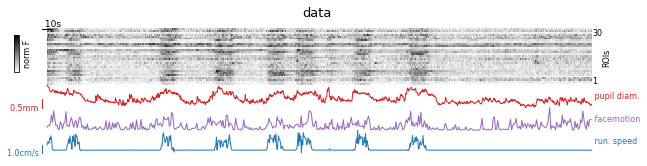

In [9]:
tlim = [0,500]
fig, ax = data.plot_raw_data(tlim,
                                 settings={'Locomotion':dict(fig_fraction=2, subsampling=30, color=ge.blue),
                                           'FaceMotion':dict(fig_fraction=2, subsampling=30, color=ge.purple),
                                           'Pupil':dict(fig_fraction=2, subsampling=10, color=ge.red),
                                           'CaImagingRaster':dict(fig_fraction=5, subsampling=1,
                                                                  roiIndices='all',
                                                                  normalization='per-line',
                                                                  quantity='CaImaging', subquantity='Fluorescence')},
                                 Tbar=10)
ge.title(ax, 'data')


## Performing PCA

using scikit-learn, see:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

adapted in the module *../physion/analysis/PCA.py*

In [10]:
from physion.analysis.PCA import PCA

pca = PCA(data,
          quantity='CaImaging', subquantity='Fluorescence')


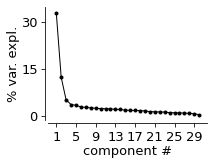

In [32]:
# variance explained:
pca.show_explained_variance(graph_env=ge, xticks_subsampling=4);

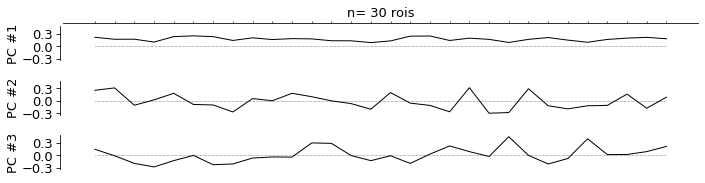

In [40]:
# display the first 3 components
fig, AX = pca.show_components(range(3), fig_args=dict(figsize=(2,.3)), graph_env=ge)

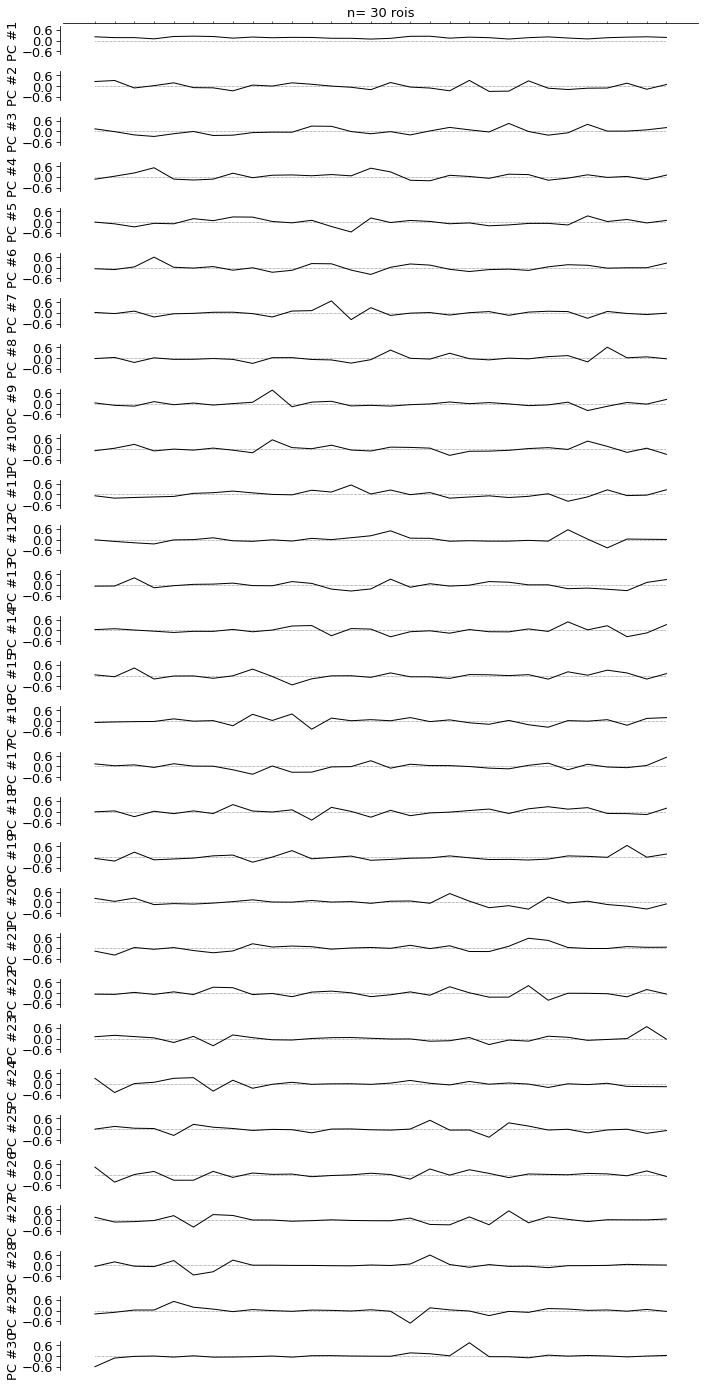

In [41]:
# display all components
fig, AX = pca.show_components(range(pca.Nfeatures), fig_args=dict(figsize=(2,.25)), graph_env=ge)

## Project activity along PCA dimensions

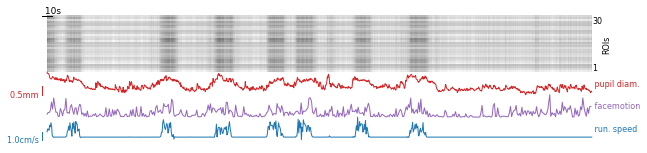

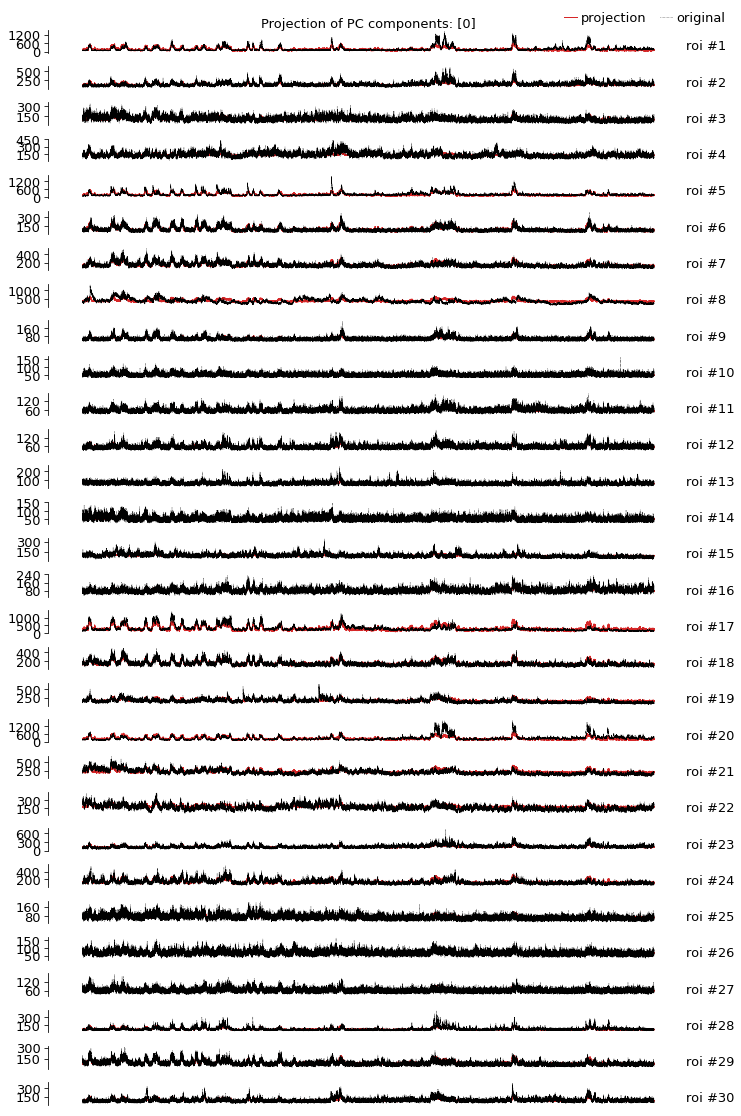

In [45]:
components = [0]
raster = pca.projected_activity(components)


# normalize for raster plot
norm_raster = np.array([(raster[i,:]-np.min(data.Fluorescence.data[i,:]))/(np.max(data.Fluorescence.data[i,:])-np.min(data.Fluorescence.data[i,:])) for i in range(raster.shape[0])])

fig, ax = data.plot_raw_data(tlim,
                             settings={'Locomotion':dict(fig_fraction=2, subsampling=30, color=ge.blue),
                                           'FaceMotion':dict(fig_fraction=2, subsampling=30, color=ge.purple),
                                           'Pupil':dict(fig_fraction=2, subsampling=10, color=ge.red),
                                           'CaImagingRaster':dict(fig_fraction=5, subsampling=1, raster=norm_raster,
                                                                  roiIndices='all',
                                                                  normalization='None')},
                               Tbar=10)
    
fig, AX = ge.figure(axes=(1,pca.Nfeatures), figsize=(2,.2))
cond = (pca.t>tlim[0]) & (pca.t>tlim[1])

for i in range(pca.Nfeatures):
    AX[i].plot(pca.t[cond], raster[i,cond], color=ge.red, lw=1, label='projection')
    AX[i].plot(pca.t[cond], data.Fluorescence.data[i,:][cond], 'k:', lw=0.5, label='original')
    ge.set_plot(AX[i], ['left'])
    ge.annotate(AX[i], 'roi #%i' % (i+1), (1,0))
ge.legend(AX[0], loc=(.8,1), ncol=2)
ge.annotate(AX[0], 'Projection of PC components: %s' % components, (0.5,1), ha='center')

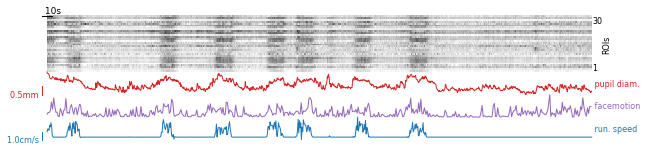

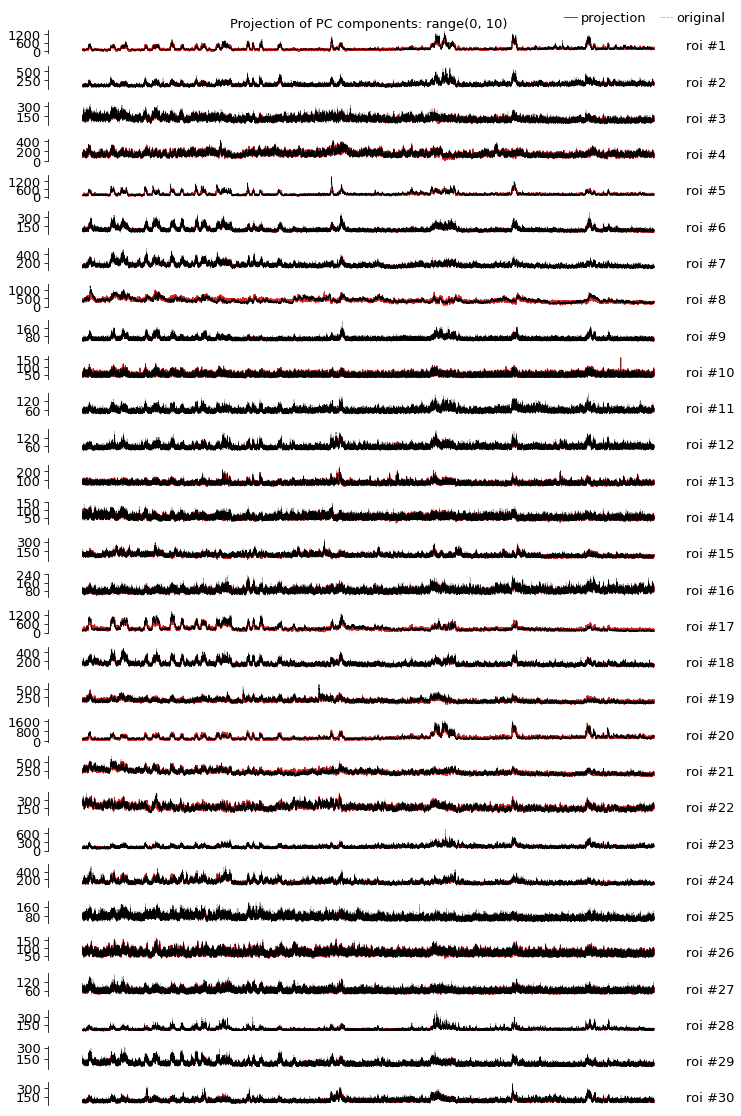

In [46]:
components = range(10)
raster = pca.projected_activity(components)

# normalize for raster plot
norm_raster = np.array([(raster[i,:]-np.min(data.Fluorescence.data[i,:]))/(np.max(data.Fluorescence.data[i,:])-np.min(data.Fluorescence.data[i,:])) for i in range(raster.shape[0])])

fig, ax = data.plot_raw_data(tlim,
                             settings={'Locomotion':dict(fig_fraction=2, subsampling=30, color=ge.blue),
                                           'FaceMotion':dict(fig_fraction=2, subsampling=30, color=ge.purple),
                                           'Pupil':dict(fig_fraction=2, subsampling=10, color=ge.red),
                                           'CaImagingRaster':dict(fig_fraction=5, subsampling=1, raster=norm_raster,
                                                                  roiIndices='all',
                                                                  normalization='None')},
                               Tbar=10)

fig, AX = ge.figure(axes=(1,pca.Nfeatures), figsize=(2,.2))
cond = (pca.t>tlim[0]) & (pca.t>tlim[1])

for i in range(pca.Nfeatures):
    AX[i].plot(pca.t[cond], raster[i,cond], color=ge.red, lw=1, label='projection')
    AX[i].plot(pca.t[cond], data.Fluorescence.data[i,:][cond], 'k:', lw=0.5, label='original')
    ge.set_plot(AX[i], ['left'])
    ge.annotate(AX[i], 'roi #%i' % (i+1), (1,0))
ge.legend(AX[0], loc=(.8,1), ncol=2)
ge.annotate(AX[0], 'Projection of PC components: %s' % components, (0.5,1), ha='center')

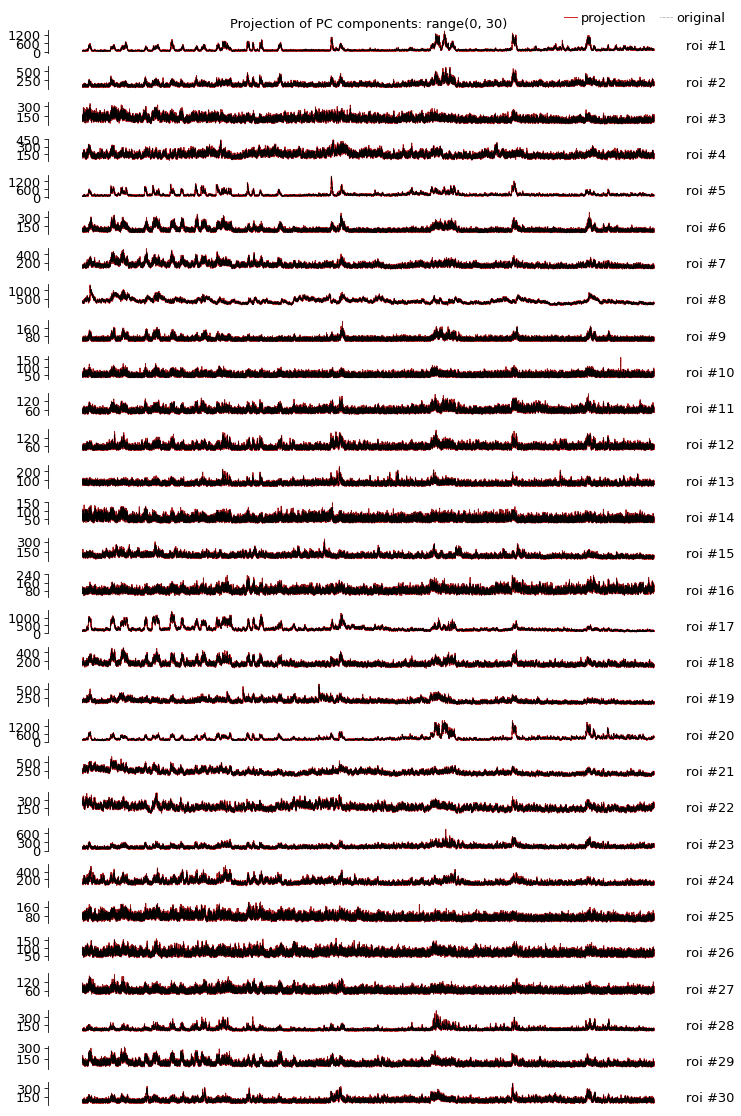

In [44]:
components = range(pca.Nfeatures) # SHOULD LEAD TO THE EXACT SAME DATA
raster = pca.projected_activity(components)

fig, AX = ge.figure(axes=(1,pca.Nfeatures), figsize=(2,.2))
cond = (pca.t>tlim[0]) & (pca.t>tlim[1])

for i in range(pca.Nfeatures):
    AX[i].plot(pca.t[cond], raster[i,cond], color=ge.red, lw=1, label='projection')
    AX[i].plot(pca.t[cond], data.Fluorescence.data[i,:][cond], 'k:', lw=0.5, label='original')
    ge.set_plot(AX[i], ['left'])
    ge.annotate(AX[i], 'roi #%i' % (i+1), (1,0))
ge.legend(AX[0], loc=(.8,1), ncol=2)
ge.annotate(AX[0], 'Projection of PC components: %s' % components, (0.5,1), ha='center')